# Importing libraries and Set Options

In [1]:
import pandas as pd
import numpy as np
import os
import requests
import json
import time
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_colwidth', None)


# Gather Data

In [2]:
#Readinng twitter-archive-enhanced.csv 
arc = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# downloading image-predictions programmatically using the Requestsurl = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response=requests.get(url)
file_name = url.split('/')[-1]
with open (file_name,'wb') as file:
    file.write(response.content)
#Readinng image-predictions.tsv
image_pre=pd.read_csv(file_name,sep='\t')

In [4]:
api_data=[]
with open ('tweet-json.txt') as txt_file:
    for line in txt_file:
        try:
            json_line=json.loads(line)
            api_data.append(json_line)
        except:
            continue
            

df_api=pd.DataFrame(api_data,columns=list(api_data[0].keys()))
df_js=df_api[['id_str','retweet_count','favorite_count']]
df_json=df_js.rename(columns={'id_str':'tweet_id' })

# Assess


## twitter-archive-enhanced visual assess

In [5]:
arc

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None


In [6]:
arc.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [7]:
arc.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
86,875747767867523072,NaN,NaN,2017-06-16 16:11:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Goose. He's a womanizer. Cheeky as h*ck, but also deep. Tongue slip game on another level. 13/10 will steal your girl https://t.co/V2WlACRJCN",NaN,NaN,NaN,https://twitter.com/dog_rates/status/875747767867523072/photo/1,13,10,Goose,None,None,None,None
2255,667773195014021121,NaN,NaN,2015-11-20 18:35:10 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",This is a rare Hungarian Pinot named Jessiga. She is either mid-stroke or got stuck in the washing machine. 8/10 https://t.co/ZU0i0KJyqD,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667773195014021121/photo/1,8,10,a,None,None,None,None
1528,690348396616552449,NaN,NaN,2016-01-22 01:40:58 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",This is Oddie. He's trying to communicate. 12/10 very solid effort (vid by @kaleseyy) https://t.co/JjxriLqZOL,NaN,NaN,NaN,https://vine.co/v/iejBWerY9X2,12,10,Oddie,None,None,None,None
144,863907417377173506,NaN,NaN,2017-05-15 00:02:33 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Albus. He's quite impressive at hide and seek. Knows he's been found this time. 13/10 usually elusive as h*ck https://t.co/ht47njyZ64,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/863907417377173506/photo/1,https://twitter.com/dog_rates/status/863907417377173506/photo/1",13,10,Albus,None,None,None,None
774,776218204058357768,NaN,NaN,2016-09-15 00:36:55 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Atlas rolled around in some chalk and now he's a magical rainbow floofer. 13/10 please never take a bath https://t.co/nzqTNw0744,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/776218204058357768/photo/1,https://twitter.com/dog_rates/status/776218204058357768/photo/1,https://twitter.com/dog_rates/status/776218204058357768/photo/1",13,10,None,None,floofer,None,None
954,751793661361422336,NaN,NaN,2016-07-09 15:02:31 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",This is Fred. He's having one heck of a summer. 11/10 https://t.co/I7SFchkNk4,NaN,NaN,NaN,https://vine.co/v/5W5YHdTJvaV,11,10,Fred,None,None,None,None
1983,672964561327235073,NaN,NaN,2015-12-05 02:23:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Terry. He's a Toasty Western Sriracha. Doubles as a table. Great for parties. 10/10 would highly recommend https://t.co/1ui7a1ZLTT,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672964561327235073/photo/1,10,10,Terry,None,None,None,None
113,870726314365509632,8.707262e+17,16487760.0,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is reserved for dogs,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
1468,694206574471057408,NaN,NaN,2016-02-01 17:11:59 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","""Martha come take a look at this. I'm so fed up with the media's unrealistic portrayal of dogs these days."" 10/10 https://t.co/Sd4qAdSRqI",NaN,NaN,NaN,https://twitter.com/dog_rates/status/694206574471057408/photo/1,10,10,None,None,None,None,None
636,793500921481273345,NaN,NaN,2016-11-01 17:12:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Fiona. She's an extremely mediocre copilot. Very distracting. Wink makes up for all the missed turns. 12/10 https://t.co/aF5MmpvPqN,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/793500921481273345/photo/1,https:

In [8]:
arc.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8,10,None,None,None,None,None


## twitter-archive-enhanced programmatically assess

In [9]:
arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [10]:
arc.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [11]:
arc['rating_numerator'].max()

1776

In [12]:
arc['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
       ... 
1776      1
960       1
666       1
144       1
165       1
Name: rating_numerator, Length: 40, dtype: int64

In [13]:
arc['rating_numerator'].min()

0

In [14]:
arc.loc[arc['rating_numerator']==0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1",0,10,None,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459439529985/photo/1,0,10,None,None,None,None,None


In [15]:
 arc.loc[arc['rating_numerator']==50]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118184652801/photo/1,50,50,Bluebert,None,None,None,None


In [16]:
 arc.loc[arc['rating_denominator']==50]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118184652801/photo/1,50,50,Bluebert,None,None,None,None
1274,709198395643068416,NaN,NaN,2016-03-14 02:04:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",NaN,NaN,NaN,https://twitter.com/dog_rates/status/709198395643068416/photo/1,45,50,None,None,None,None,None
1351,704054845121142784,NaN,NaN,2016-02-28 21:25:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704054845121142784/photo/1,60,50,a,None,None,None,None


In [17]:
arc['rating_denominator'].min()

0

In [18]:
arc['rating_denominator'].max()

170

In [19]:
arc['rating_denominator'].value_counts()

10    2333
11       3
50       3
20       2
80       2
      ... 
2        1
70       1
40       1
16       1
15       1
Name: rating_denominator, Length: 18, dtype: int64

In [20]:
arc.name.describe()

count     2356
unique     957
top       None
freq       745
Name: name, dtype: object

In [21]:
arc.name.value_counts()

None       745
a           55
Charlie     12
Lucy        11
Oliver      11
          ... 
Barclay      1
Damon        1
Lilli        1
Dug          1
Cermet       1
Name: name, Length: 957, dtype: int64

In [22]:
arc.duplicated().sum()

0

In [23]:
arc['tweet_id'].duplicated().sum()

0

In [24]:
arc['name'].duplicated().sum()

1399

In [25]:
arc['name'].duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2351     True
2352     True
2353     True
2354     True
2355     True
Name: name, Length: 2356, dtype: bool

In [26]:
arc.timestamp.duplicated().sum()

0

In [27]:
arc.source.loc[arc.source.duplicated()]

1       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
3       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
4       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
5       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
                                               ...                                        
2351    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2352    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2353    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2354    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2355    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>

In [28]:
arc.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

## twitter-archive- issues
### Quality

##### 1-There is rows for retweets and replaies and tweets without image 
##### 2-No Need For retweets rows 
##### 3-No need for replaies rows
##### 4-The tweet_id  column is appear in scientific notation
##### 5-Timestamp Dtype shoud be Datetime type
##### 6- 'rating_numerator' with  values bigger than 20 
##### 7-There is Wrong values in 'rating_numerator'  with index =1202 as its rating in tweet is 11/10

##### 8-There is Wrong values in 'rating_denominator'  with index =1202 as rating in tweet is 11/10
##### 9- Source column  represent the tweet source with wrong way
##### 10-replace expanded_urls dublicated values with only one value in same cell
##### 11- wrong values in 'name' 
##### 112- Replace the “None” string in the last four columns with ' '

### Tidiness
#####  1-No need for  in_reply_to_status_id  in_reply_to_user_id , retweeted_status_id , retweeted_status_user_id  , retweeted_status_timestamp as are irrelevant information or attributes to  analysis and observational under study

##### 2- One variable is expressed in four columns(doggo , floof , pupper , puppo ) should be one column with header(dog_kind)



## image-predictions visual assess

In [29]:
image_pre.head(100)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
95,667550904950915073,https://pbs.twimg.com/media/CUOb_gUUkAACXdS.jpg,1,web_site,0.999335,False,vizsla,0.000081,True,collie,0.000069,True
96,667724302356258817,https://pbs.twimg.com/media/CUQ7tv3W4AA3KlI.jpg,1,ibex,0.619098,False,bighorn,0.125119,False,ram,0.074673,False
97,667728196545200128,https://pbs.twimg.com/media/CUQ_QahUAAAVQjn.jpg,1,kuvasz,0.360159,True,golden_retriever,0.293744,True,Labrador_retriever,0.270673,True
98,667766675769573376,https://pbs.twimg.com/media/CURiQMnUAAAPT2M.jpg,1,fire_engine,0.883493,False,tow_truck,0.074734,False,jeep,0.012773,False


In [30]:
image_pre.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1967,867900495410671616,https://pbs.twimg.com/media/DAtm5MkXoAA4R6P.jpg,1,Labrador_retriever,0.522644,True,kuvasz,0.332461,True,dalmatian,0.032008,True
1865,843235543001513987,https://pbs.twimg.com/media/C7PGQJAWwAAibui.jpg,1,Pembroke,0.958452,True,Cardigan,0.023770,True,Chihuahua,0.005269,True
1074,717009362452090881,https://pbs.twimg.com/media/CfNUNetW8AAekHx.jpg,1,Siberian_husky,0.506154,True,Eskimo_dog,0.269656,True,malamute,0.060658,True
1987,872620804844003328,https://pbs.twimg.com/media/DBwr_hzXkAEnZBW.jpg,1,cocker_spaniel,0.513191,True,Sussex_spaniel,0.159088,True,standard_poodle,0.149509,True
1183,738537504001953792,https://pbs.twimg.com/media/Cj_P7rSUgAAYQbz.jpg,1,chow,0.808737,True,gibbon,0.028942,False,Pembroke,0.026498,True
1224,744971049620602880,https://pbs.twimg.com/media/ClarNU8VAAEDrDt.jpg,1,toy_poodle,0.497755,True,golden_retriever,0.282017,True,miniature_poodle,0.090032,True
1641,807106840509214720,https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
630,680934982542561280,https://pbs.twimg.com/media/CXMqwIQWcAA2iE0.jpg,1,Labrador_retriever,0.784398,True,Siberian_husky,0.055925,True,beagle,0.022750,True
1107,723673163800948736,https://pbs.twimg.com/media/CgsA5eFWgAAu0qn.jpg,1,golden_retriever,0.839390,True,Labrador_retriever,0.065706,True,hand_blower,0.012941,False
1773,828011680017821696,https://pbs.twimg.com/media/C32wOLcWYAAjNqS.jpg,1,American_Staffordshire_terrier,0.936662,True,Staffordshire_bullterrier,0.032999,True,bull_mastiff,0.017183,True


In [31]:
image_pre.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [32]:
image_pre.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


## image-predictions programmatically assess

In [33]:
image_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [34]:
image_pre.head(100).describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,1.000000e+02,100.0,100.000000,100.000000,100.000000
mean,6.668460e+17,1.0,0.577382,0.138256,0.066471
std,5.529133e+14,0.0,0.271469,0.101841,0.058008
min,6.660209e+17,1.0,0.044333,0.000055,0.000026
25%,6.663604e+17,1.0,0.360389,0.057593,0.017464
50%,6.668360e+17,1.0,0.541172,0.124899,0.059462
75%,6.673964e+17,1.0,0.829575,0.208825,0.092714
max,6.677732e+17,1.0,0.999888,0.454937,0.270673


In [35]:
image_pre.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [36]:
image_pre.min()

tweet_id                                                                         666020888022790149
jpg_url     https://pbs.twimg.com/ext_tw_video_thumb/674805331965399040/pu/img/-7bw8niVrgIkLKOW.jpg
img_num                                                                                           1
p1                                                                                     Afghan_hound
p1_conf                                                                                    0.044333
                                                     ...                                           
p2_conf                                                                                         0.0
p2_dog                                                                                        False
p3                                                                                     Afghan_hound
p3_conf                                                                                         0.0


In [37]:
image_pre.duplicated().sum()

0

In [38]:
image_pre['tweet_id'].duplicated().sum()

0

In [39]:
head_list=list(image_pre.columns.values)
print(head_list)

['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog']


In [40]:
for i in head_list:
    print(i)
    print(image_pre['{}'.format(i)].isna().sum())

tweet_id
0
jpg_url
0
img_num
0
p1
0
p1_conf
0
p1_dog
0
p2
0
p2_conf
0
p2_dog
0
p3
0
p3_conf
0
p3_dog
0


# image_predictions issues
## Quality

#### 1-the tweet_id are appear in int64 (numeric) shoud be object dtype.
#### 2-the last 9 columns are named by confused way as not  explain to what it contains.
#### 3-Some Values in p1 , p2 and p3 start with small letter.
#### 4-Some values in p1 , p2 and p3 have _ or - .
#### the 'p1' , 'p1_conf ’ ,'p1_dog' columns are named by confused way as not  explain to what it contains
#### 5-2075 row for image_predictions while shoud be 1971 row

## Tidiness
#### 1- The 'p2' , 'p2_conf ’ ,'p2_dog'  , 'p3' , 'p3_conf ’ and' p3_dog'  columns are not usefull because the P1  is the highest ratio and p1 cancelled another columns so it  irrelevant columns or attributes to the observational under study

## json file visual assess

In [41]:
df_json

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [42]:
df_json.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [43]:
df_json.tail()

,tweet_id,retweet_count,favorite_count
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132
2353,666020888022790149,532,2535


In [44]:
df_json.sample(20)

,tweet_id,retweet_count,favorite_count
554,803692223237865472,8689,0
580,800443802682937345,5068,0
84,876120275196170240,4903,28490
2188,668960084974809088,263,757
1840,675870721063669760,632,1783
...,...,...,...
1764,678399652199309312,30742,61794
2151,669661792646373376,482,860
754,778748913645780993,1562,7717
1091,737310737551491075,8329,16040


## json file programmatically assess

In [45]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


In [46]:
print(df_json.tweet_id.dtypes)

object


In [47]:
df_json.duplicated().sum()

0

In [48]:
df_json.retweet_count.unique()

array([8853, 6514, 4328, ...,  879,   41,  147], dtype=int64)

In [49]:
df_json.retweet_count.value_counts()

3652    5
1972    5
83      5
819     4
115     4
       ..
1526    1
230     1
1522    1
5616    1
7       1
Name: retweet_count, Length: 1724, dtype: int64

In [50]:
df_json.retweet_count.max()

79515

In [51]:
df_json.loc[df_json.retweet_count==0]

,tweet_id,retweet_count,favorite_count
290,838085839343206401,0,150


In [52]:
df_json.favorite_count.duplicated().sum()

347

In [53]:
df_json.favorite_count.value_counts()

0        179
2918       3
2706       3
2768       3
1691       3
        ... 
7493       1
5444       1
5442       1
7489       1
24574      1
Name: favorite_count, Length: 2007, dtype: int64

In [54]:
df_json.loc[df_json.favorite_count==0]

,tweet_id,retweet_count,favorite_count
31,886054160059072513,108,0
35,885311592912609280,19297,0
67,879130579576475649,7181,0
72,878404777348136964,1349,0
73,878316110768087041,6965,0
...,...,...,...
1021,746521445350707200,1110,0
1041,743835915802583040,2387,0
1240,711998809858043904,138,0
2257,667550904950915073,37,0


## tweet-json issues
## Quality

##### 1-names column not  meaningful
##### 2- retweets and replies shoud be remove from the image prediction dataframe





## Tidiness

#### A single observational unit is stored in multiple tables(thetwitter-archive ,  image-predictions and tweet-json shoud be in same table)

# clean

In [55]:
# creat copies to  keep orginal save
arc_copy= arc.copy()
imge_copy=image_pre.copy()
json_copy=df_json.copy()

# Clean twitter-archive 

## twitter-archive- issues
### Quality

##### 1-There is rows for retweets and replaies and tweets without image 
##### 2-No Need For retweets rows 
##### 3-No need for replaies rows
##### 4-The tweet_id  column is appear in scientific notation
##### 5-Timestamp Dtype shoud be Datetime type
##### 6- 'rating_numerator' with  values bigger than 20 
##### 7-There is Wrong values in 'rating_numerator'  with index =1202 as its rating in tweet is 11/10

##### 8-There is Wrong values in 'rating_denominator'  with index =1202 as rating in tweet is 11/10
##### 9- Source column  represent the tweet source with wrong way
##### 10-replace expanded_urls dublicated values with only one value in same cell
##### 11- wrong values in 'name' 
##### 12- Replace the “None” string in the last four columns with ' '

### Tidiness
#####  1-No need for  in_reply_to_status_id  in_reply_to_user_id , retweeted_status_id , retweeted_status_user_id  , retweeted_status_timestamp as are irrelevant information or attributes to  analysis and observational under study

##### 2- One variable is expressed in four columns(doggo , floof , pupper , puppo ) should be one column with header(dog_kind)



In [56]:
arc_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

## Define
#### 1-Remove rows  without image by keeping only tweets_with_image(find by image_predictions table)


## Code

In [57]:
tweets_with_image = imge_copy['tweet_id']
arc_copy = arc_copy[arc_copy.tweet_id.isin(tweets_with_image)]

## Test

In [58]:
arc_copy.count()

tweet_id                 2075
in_reply_to_status_id      23
in_reply_to_user_id        23
timestamp                2075
source                   2075
                         ... 
name                     2075
doggo                    2075
floofer                  2075
pupper                   2075
puppo                    2075
Length: 17, dtype: int64

## Define
#### 2-Remove retweets rows  by keeping only tweets with  retweeted_status_id.notnull

In [59]:
retweets=arc_copy.retweeted_status_id.notnull()

arc_copy=arc_copy[~retweets]

## Test

In [60]:
arc_copy.count()

tweet_id                 1994
in_reply_to_status_id      23
in_reply_to_user_id        23
timestamp                1994
source                   1994
                         ... 
name                     1994
doggo                    1994
floofer                  1994
pupper                   1994
puppo                    1994
Length: 17, dtype: int64

## Define
#### 3-Remove replaies rows  by keeping only tweets with  in_reply_to_status_id.notnull

## Code

In [61]:
replaies=arc_copy.in_reply_to_status_id.notnull()
arc_copy=arc_copy[~replaies]

## Test

In [62]:
arc_copy.count()

tweet_id                 1971
in_reply_to_status_id       0
in_reply_to_user_id         0
timestamp                1971
source                   1971
                         ... 
name                     1971
doggo                    1971
floofer                  1971
pupper                   1971
puppo                    1971
Length: 17, dtype: int64

In [63]:
np.logical_not(imge_copy.tweet_id.isin(list(arc_copy.tweet_id))).sum()

104

## Define
##### 4-change tweet_id column from numeric type to str(object)

## Code

In [64]:
arc_copy['tweet_id']=arc_copy['tweet_id'].astype(str)

## Test

In [65]:
print(arc_copy.tweet_id.dtypes)

object


In [66]:
arc_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1971 non-null   object 
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   1971 non-null   object 
 4   source                      1971 non-null   object 
 5   text                        1971 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               1971 non-null   object 
 10  rating_numerator            1971 non-null   int64  
 11  rating_denominator          1971 non-null   int64  
 12  name                        1971 non-null   object 
 13  doggo                       1971 

## Define 
#### 5-Change timestamp Dtype to Datetime type

## Code

In [67]:
arc_copy.timestamp=pd.to_datetime(arc_copy.timestamp )

## Test

In [68]:
print(arc_copy.timestamp.dtypes)

datetime64[ns, UTC]


In [69]:
arc_copy['timestamp'][0].date()

datetime.date(2017, 8, 1)

## Define
#### 6-replac 'rating_numerator' with  values bigger than 20 with nan

## Code

In [70]:
for i in arc_copy['rating_numerator']:
    if i > 20 :
        arc_copy['rating_numerator'].replace(i , np.nan,inplace =True)  

## Test

In [71]:
arc_copy['rating_numerator'].value_counts()

12.0    446
10.0    417
11.0    392
13.0    253
9.0     150
       ... 
3.0      19
4.0      16
2.0       9
1.0       5
0.0       1
Name: rating_numerator, Length: 15, dtype: int64

## Define 
#### 7-Replace Wrong values in 'rating_numerator'  with index =1202 as rating in tweet is 11/10

## Code

In [72]:
arc_copy['rating_numerator'].loc[arc_copy['rating_numerator']==50]

Series([], Name: rating_numerator, dtype: float64)

In [73]:
# Replace Wrong values in 'rating_numerator' with index =1202 as rating in tweet is 11/10
arc_copy['rating_numerator'].replace(50,11,inplace=True)

## Test

In [74]:
arc_copy['rating_numerator'].loc[arc_copy['rating_numerator']==50]

Series([], Name: rating_numerator, dtype: float64)

In [75]:
arc_copy['rating_numerator'].value_counts()

12.0    446
10.0    417
11.0    392
13.0    253
9.0     150
       ... 
3.0      19
4.0      16
2.0       9
1.0       5
0.0       1
Name: rating_numerator, Length: 15, dtype: int64

## Test

In [76]:
print(arc_copy['rating_numerator'].dtypes)

float64


In [77]:
arc_copy['rating_numerator'].mean()

10.527393753200204

In [78]:
arc_copy['rating_numerator'].value_counts()

12.0    446
10.0    417
11.0    392
13.0    253
9.0     150
       ... 
3.0      19
4.0      16
2.0       9
1.0       5
0.0       1
Name: rating_numerator, Length: 15, dtype: int64

## Define 
#### 8-Replace Wrong values in 'rating_denominator'  with index =1202 as rating in tweet is 11/10

## Code

In [79]:
arc_copy['rating_denominator'].loc[arc_copy['rating_denominator']==50]

1202    50
1274    50
1351    50
Name: rating_denominator, dtype: int64

In [80]:
arc_copy['rating_denominator'].replace(arc_copy['rating_denominator'].loc[1202],10,inplace=True)

## Test

In [81]:
arc_copy['rating_denominator'].loc[1202]

10

## Define
##### 9- Replace Source column to represent the tweet source  (iphone , Twitter Web Client ,TweetDeck) only 

In [82]:
arc_copy.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1932
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       28
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

## Code

In [83]:
for row in arc_copy.source:
    if (len(row)) == 82:arc_copy['source'].replace(row,'iphone',inplace=True)
    elif (len(row)) == 66:arc_copy['source'].replace(row,'Twitter Web Client',inplace=True)
    elif (len(row)) == 83:arc_copy['source'].replace(row,'TweetDeck',inplace=True)
    else:pass
        

## Test

In [84]:
arc_copy.source.value_counts()

iphone                1932
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

## Define
#### 10-replace expanded_urls dublicated values with only one value in same cell

## Code

In [85]:
for row in arc_copy.expanded_urls:
    arc_copy['expanded_urls'].replace(row,row[-63:],inplace=True)

## Test

In [86]:
arc_copy.expanded_urls

0       https://twitter.com/dog_rates/status/892420643555336193/photo/1
1       https://twitter.com/dog_rates/status/892177421306343426/photo/1
2       https://twitter.com/dog_rates/status/891815181378084864/photo/1
3       https://twitter.com/dog_rates/status/891689557279858688/photo/1
4       https://twitter.com/dog_rates/status/891327558926688256/photo/1
                                     ...                               
2351    https://twitter.com/dog_rates/status/666049248165822465/photo/1
2352    https://twitter.com/dog_rates/status/666044226329800704/photo/1
2353    https://twitter.com/dog_rates/status/666033412701032449/photo/1
2354    https://twitter.com/dog_rates/status/666029285002620928/photo/1
2355    https://twitter.com/dog_rates/status/666020888022790149/photo/1
Name: expanded_urls, Length: 1971, dtype: object

In [87]:
arc_copy.expanded_urls.value_counts().sum()

1971

## Define
#### 11- Replace wrong values in 'name' with np.NaN

## Code

In [88]:
wrong_names=['name','None', 'a', 'an' , 'the' , 'one', 'such' ,'quite','not', 'incredibly' 
             , 'mad','vey','just', 'his','my','actually','this','getting','old','all','unacceptable'
             ,'infuriating','by','space','light','life','officially']
for row in arc_copy.name:
    if row in wrong_names:
        arc_copy.name.replace(row,np.NaN,inplace=True)

## Test

In [89]:
arc_copy.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', nan, 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'Canela', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Earl',
       'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty',
       'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot', 'Louis',
       'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven', 'Beau',
       'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante', 'Nelly',
       'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash', 'Jed',
       'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie',
       'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha',
       'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jersey', 'Hobbes',


## Define
#### 12- Replace the “None” string in the last four columns with ' '

## Code

In [90]:
arc_copy.iloc[:, -4:  ] = arc_copy.iloc[:, -4:  ].replace('None','')

## Test

In [91]:
arc_copy.iloc[:, -4: ]

,doggo,floofer,pupper,puppo
0,,,,
1,,,,
2,,,,
3,,,,
4,,,,
...,...,...,...,...
2351,,,,
2352,,,,
2353,,,,
2354,,,,


In [92]:
arc_copy.doggo.value_counts()

         1898
doggo      73
Name: doggo, dtype: int64

### Tidiness
#####  1-No need for  in_reply_to_status_id  in_reply_to_user_id , retweeted_status_id , retweeted_status_user_id  , retweeted_status_timestamp as are irrelevant information or attributes to  analysis and observational under study

##### 2- One variable is expressed in four columns(doggo , floof , pupper , puppo ) should be one column with header(dog_class)


## Define
#### 1-Remove  in_reply_to_status_id  in_reply_to_user_id , retweeted_status_id , retweeted_status_user_id  , retweeted_status_timestamp as are irrelevant information or attributes to  analysis and observational under study by dropping 


## Code

In [93]:
# creat list of drop columns
arc_drop_list=['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp']
# drop All the list
arc_copy.drop(arc_drop_list,axis='columns', inplace=True)

## Test

In [94]:
arc_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1971 non-null   object             
 1   timestamp           1971 non-null   datetime64[ns, UTC]
 2   source              1971 non-null   object             
 3   text                1971 non-null   object             
 4   expanded_urls       1971 non-null   object             
 5   rating_numerator    1953 non-null   float64            
 6   rating_denominator  1971 non-null   int64              
 7   name                1353 non-null   object             
 8   doggo               1971 non-null   object             
 9   floofer             1971 non-null   object             
 10  pupper              1971 non-null   object             
 11  puppo               1971 non-null   object             
dtypes: datetime64[ns, UTC](1), float64

## Define
##### 2- combine four columns(doggo , floof , pupper , puppo ) in one column with header(dog_class) and drop four columns

In [95]:
#combine four columns(doggo , floof , pupper , puppo ) in one column with header(dog_class)
arc_copy['dog_class']=arc_copy.doggo+arc_copy.floofer+arc_copy.pupper+arc_copy.puppo

In [96]:
#drop four columns
arc_copy.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace=True)

## Test

In [97]:
arc_copy

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_class
0,892420643555336193,2017-08-01 16:23:56+00:00,iphone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10,Phineas,
1,892177421306343426,2017-08-01 00:17:27+00:00,iphone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10,Tilly,
2,891815181378084864,2017-07-31 00:18:03+00:00,iphone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10,Archie,
3,891689557279858688,2017-07-30 15:58:51+00:00,iphone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10,Darla,
4,891327558926688256,2017-07-29 16:00:24+00:00,iphone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",https://twitter.com/dog_rates/status/891327558926688256/photo/1,12.0,10,Franklin,
...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50+00:00,iphone,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5.0,10,NaN,
2352,666044226329800704,2015-11-16 00:04:52+00:00,iphone,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6.0,10,NaN,
2353,666033412701032449,2015-11-15 23:21:54+00:00,iphone,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9.0,10,NaN,
2354,666029285002620928,2015-11-15 23:05:30+00:00,iphone,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7.0,10,NaN,


In [98]:
arc_copy['dog_class'].value_counts()

                1668
pupper           201
doggo             63
puppo             22
doggopupper        8
floofer            7
doggofloofer       1
doggopuppo         1
Name: dog_class, dtype: int64

# Clean image_predictions 

## image_predictions issues
#### 1-the tweet_id are appear in int64 (numeric) shoud be object dtype.
#### 2-the last 9 columns are named by confused way as not  explain to what it contains.
#### 3-Some Values in p1 , p2 and p3 start with small letter.
#### 4-Some values in p1 , p2 and p3 have _ or - .
#### the 'p1' , 'p1_conf ’ ,'p1_dog' columns are named by confused way as not  explain to what it contains
#### 5-2075 row for image_predictions while shoud be 1971 row
## Tidiness
#### 1- The 'p2' , 'p2_conf ’ ,'p2_dog'  , 'p3' , 'p3_conf ’ and' p3_dog'  columns are not usefull because the P1  is the highest ratio and p1 cancelled another columns so it  irrelevant columns or attributes to the observational under study

In [99]:
imge_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [100]:
imge_copy.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


## Define
#### 1-Change tweet_id dtype from int64 to object dtype

## Code

In [101]:
#Change tweet_id dtype from int64 to object dtype
imge_copy.tweet_id=imge_copy.tweet_id.astype("str")

## Test

In [102]:
print(imge_copy.tweet_id.dtypes)

object


## Define
#### 2-The last 9 columns are named by confused way as not explain to what it contains

## Code

In [103]:
# getting list of dataset columns variable to modify it
imge_copy.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [104]:
# Renaming the dataset columns variable
imge_copy.columns=['tweet_id', 'jpg_url', 'img_num','prediction_1', 'confidence_1', 'breed_1',
       'prediction_2', 'confidence_2', 'breed_2',
       'prediction_3', 'confidence_3', 'breed_3']

## Test

In [105]:
imge_copy.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'prediction_1', 'confidence_1',
       'breed_1', 'prediction_2', 'confidence_2', 'breed_2', 'prediction_3',
       'confidence_3', 'breed_3'],
      dtype='object')

In [106]:
imge_copy

,tweet_id,jpg_url,img_num,prediction_1,confidence_1,breed_1,prediction_2,confidence_2,breed_2,prediction_3,confidence_3,breed_3
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [107]:
imge_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   tweet_id      2075 non-null   object 
 1   jpg_url       2075 non-null   object 
 2   img_num       2075 non-null   int64  
 3   prediction_1  2075 non-null   object 
 4   confidence_1  2075 non-null   float64
 5   breed_1       2075 non-null   bool   
 6   prediction_2  2075 non-null   object 
 7   confidence_2  2075 non-null   float64
 8   breed_2       2075 non-null   bool   
 9   prediction_3  2075 non-null   object 
 10  confidence_3  2075 non-null   float64
 11  breed_3       2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


## Define
#### 3-Some Values in p1 , p2 and p3 which I named(prediction_1,prediction_2,prediction_3) start with small letter

In [108]:
url_list=imge_copy['jpg_url'].loc[imge_copy['breed_1']==False]

## Code

In [109]:
imge_copy.prediction_1=imge_copy.prediction_1.str.capitalize()
imge_copy.prediction_2=imge_copy.prediction_2.str.capitalize()
imge_copy.prediction_3=imge_copy.prediction_3.str.capitalize()


## Test


In [110]:
print(imge_copy.prediction_1.unique(),imge_copy.prediction_2.unique(),imge_copy.prediction_3.unique())

['Welsh_springer_spaniel' 'Redbone' 'German_shepherd'
 'Rhodesian_ridgeback' 'Miniature_pinscher' 'Bernese_mountain_dog'
 'Box_turtle' 'Chow' 'Shopping_cart' 'Miniature_poodle' 'Golden_retriever'
 'Gordon_setter' 'Walker_hound' 'Pug' 'Bloodhound' 'Lhasa'
 'English_setter' 'Hen' 'Desktop_computer' 'Italian_greyhound'
 'Maltese_dog' 'Three-toed_sloth' 'Ox' 'Malamute' 'Guinea_pig'
 'Soft-coated_wheaten_terrier' 'Chihuahua' 'Black-and-tan_coonhound'
 'Coho' 'Toy_terrier' 'Blenheim_spaniel' 'Pembroke' 'Llama'
 'Chesapeake_bay_retriever' 'Curly-coated_retriever' 'Dalmatian'
 'Ibizan_hound' 'Border_collie' 'Labrador_retriever' 'Seat_belt' 'Snail'
 'Miniature_schnauzer' 'Airedale' 'Triceratops' 'Swab' 'Hay' 'Hyena'
 'Jigsaw_puzzle' 'West_highland_white_terrier' 'Toy_poodle'
 'Giant_schnauzer' 'Vizsla' 'Vacuum' 'Rottweiler' 'Siberian_husky' 'Teddy'
 'Papillon' 'Saint_bernard' 'Porcupine' 'Goose' 'Tibetan_terrier' 'Borzoi'
 'Beagle' 'Hare' 'Yorkshire_terrier' 'Pomeranian' 'Electric_fan'
 'Web_si

## Define
#### 4-Replace   _ or -  in p1 , p2 and p3 which I named(prediction_1,prediction_2,prediction_3)   to '  ' .

## Code

In [111]:
imge_copy.prediction_1=imge_copy.prediction_1.str.replace('_',' ')
imge_copy.prediction_2=imge_copy.prediction_2.str.replace('_',' ')
imge_copy.prediction_3=imge_copy.prediction_3.str.replace('_',' ')
imge_copy.prediction_1=imge_copy.prediction_1.str.replace('-',' ')
imge_copy.prediction_2=imge_copy.prediction_2.str.replace('-',' ')
imge_copy.prediction_3=imge_copy.prediction_3.str.replace('-',' ')

## Test

In [112]:
print(imge_copy.prediction_1.unique(),imge_copy.prediction_2.unique(),imge_copy.prediction_3.unique())

['Welsh springer spaniel' 'Redbone' 'German shepherd'
 'Rhodesian ridgeback' 'Miniature pinscher' 'Bernese mountain dog'
 'Box turtle' 'Chow' 'Shopping cart' 'Miniature poodle' 'Golden retriever'
 'Gordon setter' 'Walker hound' 'Pug' 'Bloodhound' 'Lhasa'
 'English setter' 'Hen' 'Desktop computer' 'Italian greyhound'
 'Maltese dog' 'Three toed sloth' 'Ox' 'Malamute' 'Guinea pig'
 'Soft coated wheaten terrier' 'Chihuahua' 'Black and tan coonhound'
 'Coho' 'Toy terrier' 'Blenheim spaniel' 'Pembroke' 'Llama'
 'Chesapeake bay retriever' 'Curly coated retriever' 'Dalmatian'
 'Ibizan hound' 'Border collie' 'Labrador retriever' 'Seat belt' 'Snail'
 'Miniature schnauzer' 'Airedale' 'Triceratops' 'Swab' 'Hay' 'Hyena'
 'Jigsaw puzzle' 'West highland white terrier' 'Toy poodle'
 'Giant schnauzer' 'Vizsla' 'Vacuum' 'Rottweiler' 'Siberian husky' 'Teddy'
 'Papillon' 'Saint bernard' 'Porcupine' 'Goose' 'Tibetan terrier' 'Borzoi'
 'Beagle' 'Hare' 'Yorkshire terrier' 'Pomeranian' 'Electric fan'
 'Web si

In [113]:
imge_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   tweet_id      2075 non-null   object 
 1   jpg_url       2075 non-null   object 
 2   img_num       2075 non-null   int64  
 3   prediction_1  2075 non-null   object 
 4   confidence_1  2075 non-null   float64
 5   breed_1       2075 non-null   bool   
 6   prediction_2  2075 non-null   object 
 7   confidence_2  2075 non-null   float64
 8   breed_2       2075 non-null   bool   
 9   prediction_3  2075 non-null   object 
 10  confidence_3  2075 non-null   float64
 11  breed_3       2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


## Define
##### 5-Dropping the retweets and replies ids from the image prediction dataframe


## Code

In [114]:
imge_copy=imge_copy[~np.logical_not(imge_copy.tweet_id.isin(list(arc_copy.tweet_id)))]

## Test

In [115]:
imge_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   tweet_id      1971 non-null   object 
 1   jpg_url       1971 non-null   object 
 2   img_num       1971 non-null   int64  
 3   prediction_1  1971 non-null   object 
 4   confidence_1  1971 non-null   float64
 5   breed_1       1971 non-null   bool   
 6   prediction_2  1971 non-null   object 
 7   confidence_2  1971 non-null   float64
 8   breed_2       1971 non-null   bool   
 9   prediction_3  1971 non-null   object 
 10  confidence_3  1971 non-null   float64
 11  breed_3       1971 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 159.8+ KB


## Tidiness
#### 1- The last 6 columns are not usefull because the P1  is the highest ratio and p1 cancelled another columns so it  irrelevant columns or attributes to the observational under study

In [116]:
imge_copy.iloc[:,-6:]

,prediction_2,confidence_2,breed_2,prediction_3,confidence_3,breed_3
0,Collie,0.156665,True,Shetland sheepdog,0.061428,True
1,Miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
2,Malinois,0.138584,True,Bloodhound,0.116197,True
3,Redbone,0.360687,True,Miniature pinscher,0.222752,True
4,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...
2070,English springer,0.225770,True,German short haired pointer,0.175219,True
2071,Labrador retriever,0.168086,True,Spatula,0.040836,False
2072,Malamute,0.078253,True,Kelpie,0.031379,True
2073,Pekinese,0.090647,True,Papillon,0.068957,True


In [117]:
imge_copy

,tweet_id,jpg_url,img_num,prediction_1,confidence_1,breed_1,prediction_2,confidence_2,breed_2,prediction_3,confidence_3,breed_3
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,Collie,0.156665,True,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,Redbone,0.360687,True,Miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,True,English springer,0.225770,True,German short haired pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Paper towel,0.170278,False,Labrador retriever,0.168086,True,Spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True


In [118]:
#drop last 6 columns
drop_list=['prediction_2','confidence_2','breed_2','prediction_3','confidence_3','breed_3']
imge_copy=imge_copy.drop(drop_list, axis='columns')

## Test

In [119]:
imge_copy.iloc[:,-6:]

,tweet_id,jpg_url,img_num,prediction_1,confidence_1,breed_1
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature pinscher,0.560311,True
...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Paper towel,0.170278,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True


## Clean tweet-json issues
## Quality

##### 1-names column not  meaningful
##### 2- retweets and replies shoud be remove from the image prediction dataframe





## Tidiness

#### A single observational unit is stored in multiple tables(thetwitter-archive ,  image-predictions and tweet-json shoud be in same table)

## Define 
##### 1-names column not  meaningful

## Code

In [120]:
json_copy=json_copy.rename(columns={'retweet_count':'retweets','favorite_count':'likes'})

## Test

In [121]:
json_copy

,tweet_id,retweets,likes
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


## Define
##### 2-Dropping the retweets and replies ids from the image prediction dataframe

## Code

In [122]:
json_copy=json_copy[~np.logical_not(json_copy.tweet_id.isin(list(arc_copy.tweet_id)))]

## Test

In [123]:
json_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tweet_id  1971 non-null   object
 1   retweets  1971 non-null   int64 
 2   likes     1971 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.6+ KB


# TEST ALL DATAFRAMES TO COMBINE

In [124]:
arc_copy

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_class
0,892420643555336193,2017-08-01 16:23:56+00:00,iphone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10,Phineas,
1,892177421306343426,2017-08-01 00:17:27+00:00,iphone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10,Tilly,
2,891815181378084864,2017-07-31 00:18:03+00:00,iphone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10,Archie,
3,891689557279858688,2017-07-30 15:58:51+00:00,iphone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10,Darla,
4,891327558926688256,2017-07-29 16:00:24+00:00,iphone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",https://twitter.com/dog_rates/status/891327558926688256/photo/1,12.0,10,Franklin,
...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50+00:00,iphone,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5.0,10,NaN,
2352,666044226329800704,2015-11-16 00:04:52+00:00,iphone,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6.0,10,NaN,
2353,666033412701032449,2015-11-15 23:21:54+00:00,iphone,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9.0,10,NaN,
2354,666029285002620928,2015-11-15 23:05:30+00:00,iphone,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7.0,10,NaN,


In [125]:
imge_copy

,tweet_id,jpg_url,img_num,prediction_1,confidence_1,breed_1
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature pinscher,0.560311,True
...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Paper towel,0.170278,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True


In [126]:
json_copy

,tweet_id,retweets,likes
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [127]:
arc_imge=pd.merge(arc_copy,imge_copy,on=['tweet_id'],how='inner')

In [128]:
arc_imge_json=pd.merge(arc_imge,json_copy,on=['tweet_id'],how='inner')

In [129]:
arc_imge_json

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_class,jpg_url,img_num,prediction_1,confidence_1,breed_1,retweets,likes
0,892420643555336193,2017-08-01 16:23:56+00:00,iphone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10,Phineas,,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,Orange,0.097049,False,8853,39467
1,892177421306343426,2017-08-01 00:17:27+00:00,iphone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10,Tilly,,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,6514,33819
2,891815181378084864,2017-07-31 00:18:03+00:00,iphone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10,Archie,,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,4328,25461
3,891689557279858688,2017-07-30 15:58:51+00:00,iphone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10,Darla,,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Paper towel,0.170278,False,8964,42908
4,891327558926688256,2017-07-29 16:00:24+00:00,iphone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",https://twitter.com/dog_rates/status/891327558926688256/photo/1,12.0,10,Franklin,,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,True,9774,41048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1966,666049248165822465,2015-11-16 00:24:50+00:00,iphone,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5.0,10,NaN,,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature pinscher,0.560311,True,41,111
1967,666044226329800704,2015-11-16 00:04:52+00:00,iphone,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6.0,10,NaN,,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,147,311
1968,666033412701032449,2015-11-15 23:21:54+00:00,iphone,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9.0,10,NaN,,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,47,128
1969,666029285002620928,2015-11-15 23:05:30+00:00,iphone,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7.0,10,NaN,,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,48,132


In [130]:
twitter_archive_master=arc_imge_json.copy()

# Test

In [131]:
twitter_archive_master

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_class,jpg_url,img_num,prediction_1,confidence_1,breed_1,retweets,likes
0,892420643555336193,2017-08-01 16:23:56+00:00,iphone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10,Phineas,,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,Orange,0.097049,False,8853,39467
1,892177421306343426,2017-08-01 00:17:27+00:00,iphone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10,Tilly,,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,6514,33819
2,891815181378084864,2017-07-31 00:18:03+00:00,iphone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10,Archie,,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,4328,25461
3,891689557279858688,2017-07-30 15:58:51+00:00,iphone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10,Darla,,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Paper towel,0.170278,False,8964,42908
4,891327558926688256,2017-07-29 16:00:24+00:00,iphone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",https://twitter.com/dog_rates/status/891327558926688256/photo/1,12.0,10,Franklin,,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,True,9774,41048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1966,666049248165822465,2015-11-16 00:24:50+00:00,iphone,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5.0,10,NaN,,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature pinscher,0.560311,True,41,111
1967,666044226329800704,2015-11-16 00:04:52+00:00,iphone,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6.0,10,NaN,,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,147,311
1968,666033412701032449,2015-11-15 23:21:54+00:00,iphone,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9.0,10,NaN,,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,47,128
1969,666029285002620928,2015-11-15 23:05:30+00:00,iphone,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7.0,10,NaN,,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,48,132


In [132]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1971 non-null   object             
 1   timestamp           1971 non-null   datetime64[ns, UTC]
 2   source              1971 non-null   object             
 3   text                1971 non-null   object             
 4   expanded_urls       1971 non-null   object             
 5   rating_numerator    1953 non-null   float64            
 6   rating_denominator  1971 non-null   int64              
 7   name                1353 non-null   object             
 8   dog_class           1971 non-null   object             
 9   jpg_url             1971 non-null   object             
 10  img_num             1971 non-null   int64              
 11  prediction_1        1971 non-null   object             
 12  confidence_1        1971 non-null 

# STORING DATA

In [133]:
twitter_archive_master.to_csv('twitter_archive_master.csv',encoding='utf-8',index=False)

# ANALYSES

### Creat time data fram for all necessary time analyses

In [134]:
# creat time series and index and drop timestamp
df_time=twitter_archive_master.copy()
df_time.index=df_time['timestamp']
df_time.drop(columns='timestamp',inplace = True)
df_time.sort_index(inplace=True)

## The coorelation between (retweets ,likes)


In [135]:
twitter_archive_master['retweets'].corr(twitter_archive_master['likes'])

0.9130143486107436

Text(0, 0.5, 'Likes')

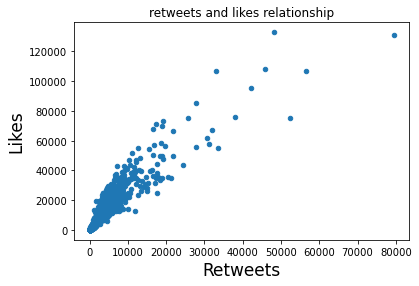

In [136]:
twitter_archive_master.plot(x=['retweets'],y=['likes'],kind='scatter',title='retweets and likes relationship',legend=True)
plt.xlabel('Retweets',fontsize=17)
plt.ylabel('Likes',fontsize=17)

##### 0.9 This means that there is a direct relationship between the retweets and likes The likes increase with the increase in retweets

In [137]:
data_plot2 = df_time.groupby([(df_time.index.year),(df_time.index.month)]).retweets.mean()
data_plot2

timestamp  timestamp
2015       11            541.620339
           12           1517.000000
2016       1            1519.614458
           2            1609.111111
           3            1650.754237
                           ...     
2017       4            5844.275000
           5            7570.023810
           6            6586.090909
           7            6868.530612
           8            7683.500000
Name: retweets, Length: 22, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

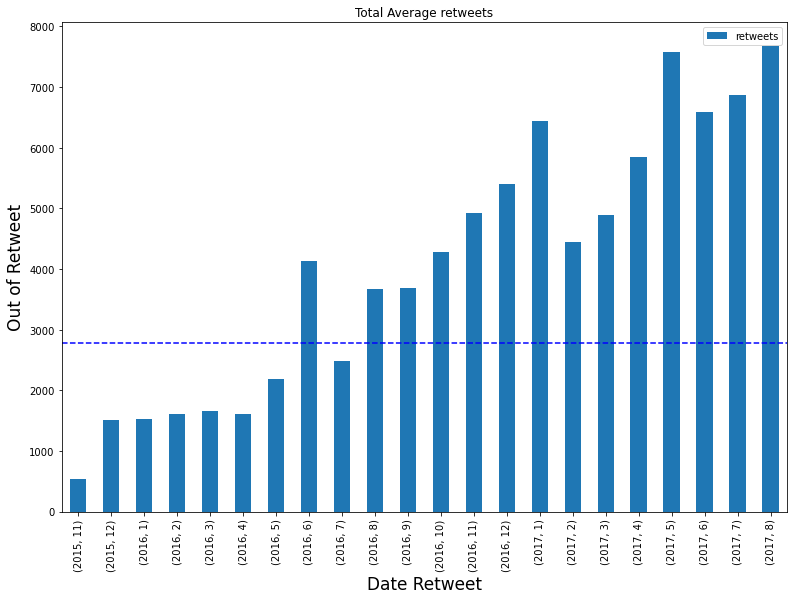

In [138]:
data_plot2.plot(style='-ro',figsize=(13,9),title='Total Average retweets',kind='bar',legend=True)
plt.axhline(y=2784.44,color='b',linestyle='--',label='out of rating')
plt.xlabel('Date Retweet',fontsize=17)
plt.ylabel('Out of Retweet',fontsize=17)
plt.show

##### This means that there is a direct relationship between the time and retweets The retweets increase when time pass

## The timeseries analysis- relation between (rating , time)

In [139]:
# prepar data to plot by agregating time with mean of rate
data_plot = df_time.groupby([(df_time.index.year),(df_time.index.month)]).rating_numerator.mean()
data_plot

timestamp  timestamp
2015       11            8.880952
           12            9.557423
2016       1            10.066667
           2            10.094340
           3            10.391304
                          ...    
2017       4            12.225000
           5            12.761905
           6            12.500000
           7            12.632653
           8            13.000000
Name: rating_numerator, Length: 22, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

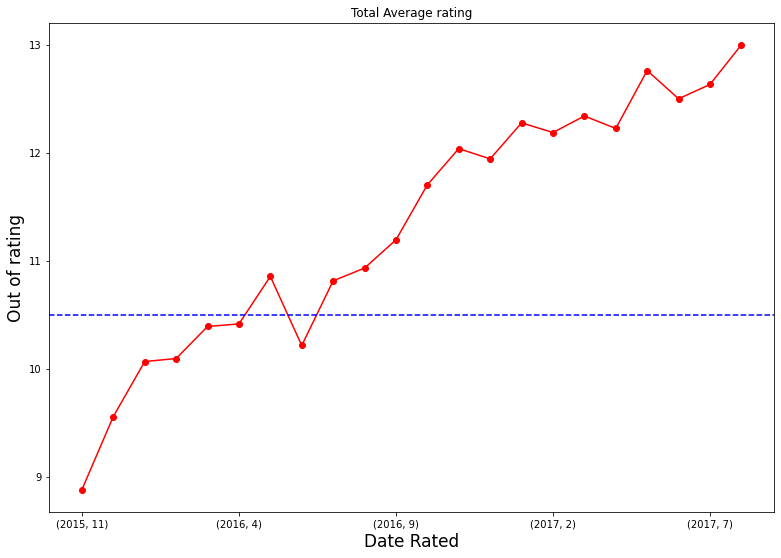

In [140]:
# plot
data_plot.plot(style='-ro',figsize=(13,9),title='Total Average rating')
plt.axhline(y=10.5,color='b',linestyle='--',label='out of rating')

plt.xlabel('Date Rated',fontsize=17)
plt.ylabel('Out of rating',fontsize=17)
plt.show

##### This means that there is a direct relationship between the time and rating The rating increase when time pass

### The dog_class percentage

In [141]:

twitter_archive_master.dog_class.value_counts()

                1668
pupper           201
doggo             63
puppo             22
doggopupper        8
floofer            7
doggofloofer       1
doggopuppo         1
Name: dog_class, dtype: int64

In [142]:
df_class=twitter_archive_master.dog_class.replace('',np.nan)
df_class=df_class.value_counts()

(-1.1792779088792997,
 1.6275565068217819,
 -1.332021559573397,
 1.2037044015264708)

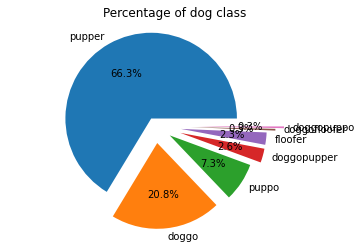

In [143]:
plt.pie(df_class
       ,labels=['pupper','doggo','puppo','doggopupper','floofer','doggofloofer','doggopuppo'],
       autopct='%1.1f%%',explode=(.1,0.2,0.2,0.3,0.3,0.4,0.5))
plt.title('Percentage of dog class')
plt.axis('equal')

### Tthis mean the most  popullar dog class is  pupper with 66.3 % and last one is floofer with 2.3%

# The End
## Thanks